In [1]:
from numpy import cos
import matplotlib.pyplot as plt

# Q1: Damped and Forced Harmonic Oscillator:

Use RK4 to solve the damped and forced harmonic oscillator satisfying

$$2\ddot y + \gamma\dot y + 2y = 2\cos(\omega t),\quad\text{ where }y(0) = 2\text{ and }\dot y(0) = -1$$

for $\gamma = 0.2$ and $\omega = 1.2$.

In [2]:
# Importing the function
from library.diffeq import c_ode

## Damped Harmonic Oscilation
Let $\dot y = z$ (or $\frac{dy}{dt} = z$).

Then the given equation reduces to:
$$\ddot y = \dot z = \frac{dz}{dt} = - y - \frac{1}{2}\gamma z$$

In [3]:
gamma = 0.2
omega = 1.2
def dydt(t, y, z): return z
def dzdt(t, y, z): return -y-(gamma*z)/2
t_0 = 0
y_0 = 2
z_0 = -1
h = 0.1

ts, ys, zs = c_ode([dydt, dzdt], [t_0, y_0, z_0], 100, h)

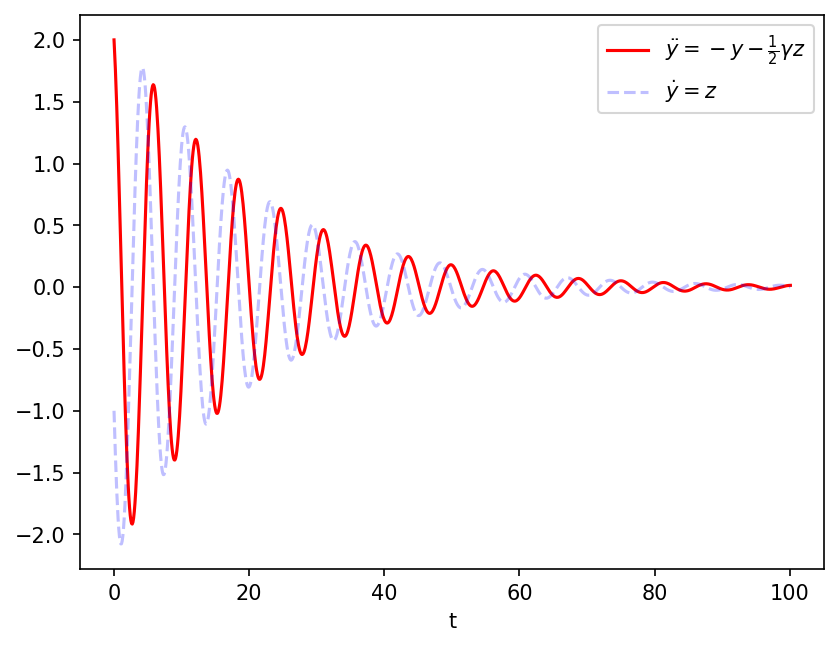

In [4]:
plt.figure(dpi=150)
plt.plot(ts, ys, "r", label=r"$\ddot y = - y - \frac{1}{2}\gamma z$")
plt.plot(ts, zs, "b--", label=r"$\dot y = z$", alpha=0.25)
plt.xlabel("t")
plt.legend()

## Forced Harmonic Oscillation
Let $\dot y = z$ (or $\frac{dy}{dt} = z$).

Then the given equation reduces to:
$$\ddot y = \dot z = \frac{dz}{dt} = \cos(\omega t) - y - \frac{1}{2}\gamma z$$

In [5]:
gamma = 0.2
omega = 1.2
def f1(t, y, z): return z
def f2(t, y, z): return cos(omega*t)-y-(gamma*z)/2
t_0 = 0
y_0 = 2
z_0 = -1
h = 0.1

ts, ys, zs = c_ode([f1, f2], [t_0, y_0, z_0], 60, h)

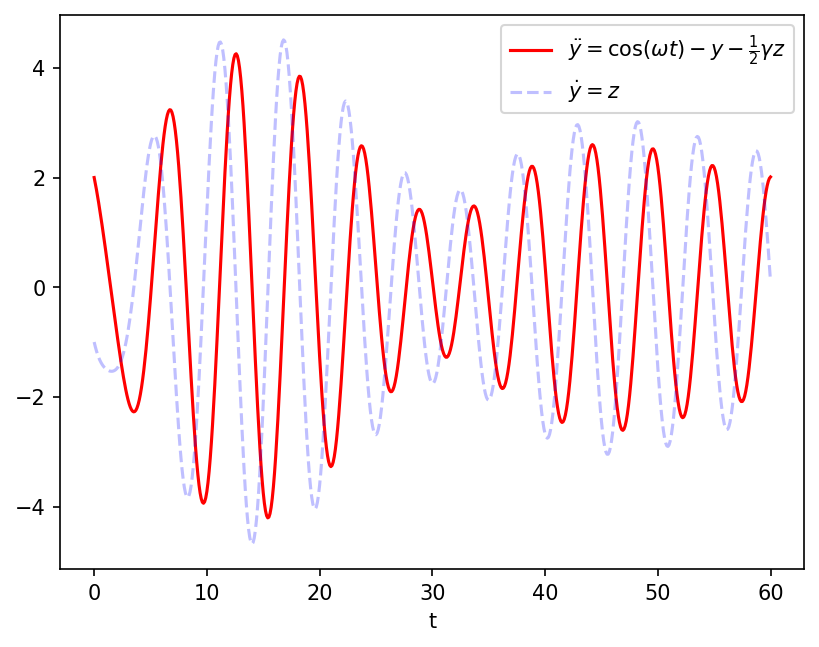

In [6]:
plt.figure(dpi=150)
plt.plot(ts, ys, "r", label=r"$\ddot y = \cos(\omega t) - y - \frac{1}{2}\gamma z$")
plt.plot(ts, zs, "b--", label=r"$\dot y = z$", alpha=0.25)
plt.xlabel("t")
plt.legend()

# Q2. Solution to Heat Equation:
Equation for heat conduction in a thin, un-insulated rod of length $L = 10 m$ is
$$ \frac{d^2 T}{d x^2}+\alpha\left(T_a-T\right)=0 $$
where the heat transfer coefficient $α = 0.01\ m^{−2}$ parameterizes heat dissipated to the surrounding air and $T_{a} = 20^{\circ}$ C is the ambient temperature. If $T(x = 0) = 40^{\circ}$ C and $T(x = L) = 200^{\circ}$ C, solve the boundary value problem using Shooting Method with RK4 integrator and determine at what $x$ the temperature is $T = 100^{\circ}$ C.

In [7]:
from library.diffeq import shooting_method
from library.interpolation import interpolate
from library.matrix import truncate_p

The temperature is 100 degree centigrade at x = 4.431


Text(0, 0.5, 'T ($^\\circ C$)')

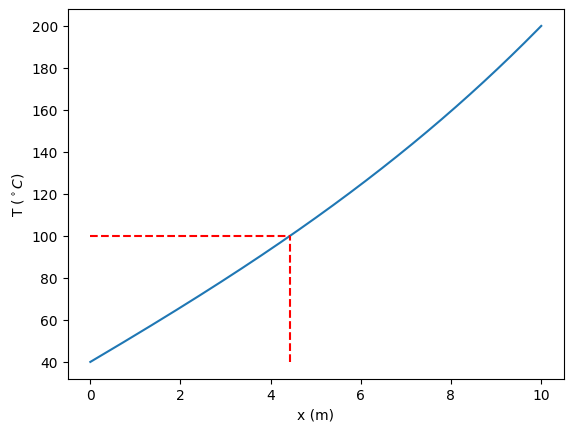

In [8]:
alpha = 0.01
Ta = 20
def f1(x, T, z):
    return z
def f2(x, T, z):
    return alpha*(T - Ta)

xi = 0
Ti = 40
xf = 10
Tf = 200
h = 0.01
tol = 1e-3

x, T, z = shooting_method(f1, f2, xi, Ti, xf, Tf, h, tol)
T100 = interpolate(100, T, x)
print("The temperature is 100 degree centigrade at x =", truncate_p(T100,3,str))
plt.plot(x, T)
plt.plot([0, T100], [100, 100], "r--")
plt.plot([T100, T100], [40, 100], "r--")
plt.xlabel("x (m)")
plt.ylabel(r"T ($^\circ C$)")

# Q3: Partial Differential Equations:
Solve the 1-dimensional heat equation $u_{xx} = u_t$ over a conducting bar, of length 2 units, kept at $0^\circ C$ but is heated to $300^\circ C$ at its center at time $t = 0$. Choose your $\Delta x$ and $\Delta t$ with care such that $\Delta t/(\Delta x)^2 \ll 0.5$.

In [9]:
from library.diffeq import heat_eq2
import matplotlib.pyplot as plt
import numpy as np
from library.myrandom import Random
from tqdm import tqdm

In [10]:
def temp(Nx, i):
    if i == Nx/2: return 300
    return 1

Lx = 2
Nx = 20
Lt = 1
Nt = 20000
sol = heat_eq2(temp, Lx, Nx, Lt, Nt, needed=1001)

alpha=0.004999999999999999


100%|██████████| 1000/1000 [00:00<00:00, 71347.47it/s]


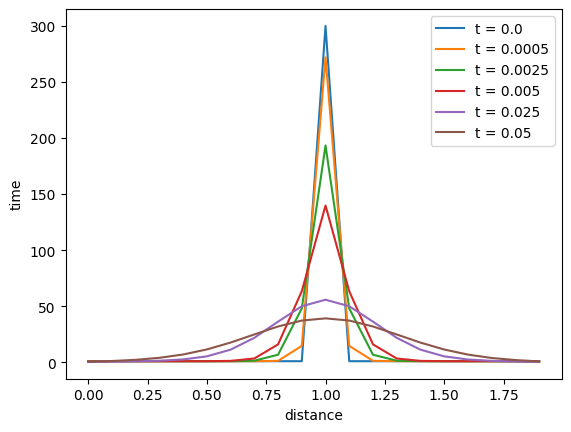

In [11]:
# Plotting the temperature curves at different times
times = [0, 10, 50, 100, 500, 1000]
x = [i*Lx/Nx for i in range(Nx)]
for time in times:
    plt.plot(x, sol[time], label=f"t = {time*Lt/Nt}")

plt.xlabel("distance")
plt.ylabel("time")
plt.legend()

100%|██████████| 1000/1000 [00:00<00:00, 999119.58it/s]


Text(0, 0.5, 'time steps $(\\times 100)$')

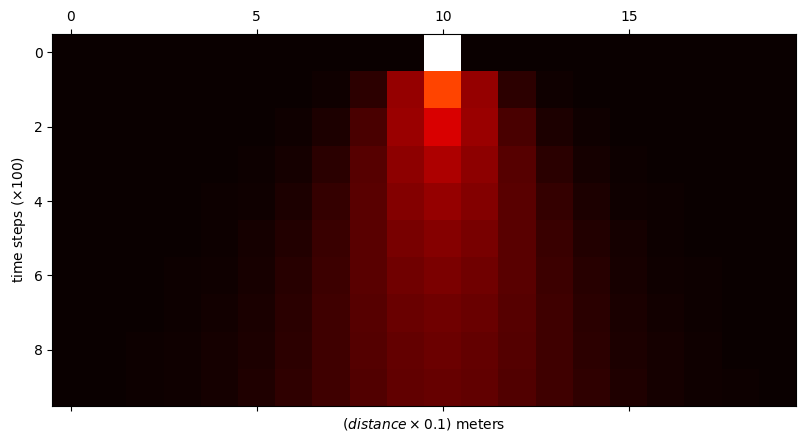

In [12]:
# Plotting Heat Map
plt.matshow([sol[i] for i in tqdm(range(1000)) if not i%100], cmap="hot")
plt.xlabel(r"$(distance \times 0.1)$ meters")
plt.ylabel(r"time steps $(\times 100)$")

# Q4: Dominant Eigen Value and Eigen Vector of the matrix:

$$
\begin{pmatrix}
2 & 1 & 2 \\
2 & 2 & -2 \\
3 & 1 & 1
\end{pmatrix}
$$

In [13]:
from library.matrix import Matrix
from library.eigen import get_eigen

In [14]:
A = Matrix(
    [
        [2, 1, 2],
        [2, 2, -2],
        [3, 1, 1]
    ], name="A"
)

val, vec, i = get_eigen(A, epsilon=1e-3, seed=0.6)
print(f"Number of iterations: {i}")
print(f"Eigenvalue: {val}")
print(vec)

Number of iterations: 8
Eigenvalue: 4.000
e-vector = |0.707|
           |0.000|
           |0.707|

